# Insurance

In [37]:
# Comando mágico do jupyter
# Para plotar graficos no jupyter sem prescisar chamar plt.show()
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import matplotlib as mpl
import numpy as np
import os

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Seed para geração de números aleatórios
np.random.seed(42)

# Configurações globais dos gráficos
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

data_frame = pd.read_csv("insurance.csv")

## Análise Exploratória de Dados

In [38]:
data_frame.shape

(1338, 7)

In [39]:
data_frame = data_frame.drop_duplicates()

data_frame.shape

(1337, 7)

In [40]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


1337 registros, todos não nulos, temos três tipos diferentes de dados categóricos ["sex", "smoker", "region"]

In [41]:
set(data_frame["sex"])

{'female', 'male'}

In [42]:
set(data_frame["smoker"])

{'no', 'yes'}

In [43]:
set(data_frame["region"])

{'northeast', 'northwest', 'southeast', 'southwest'}

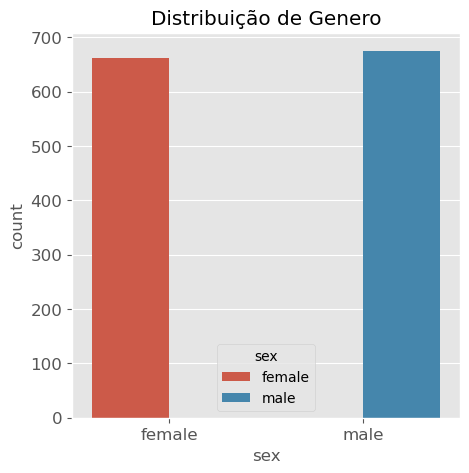

In [44]:
# Qual a relação entre homens e mulheres na base de dados?
import seaborn as sns
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex', hue='sex', data=data_frame)
plt.title('Distribuição de Genero')
plt.show()

A base tem um pouco mais de homens que de mulheres

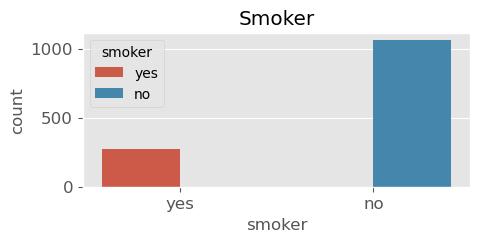

In [45]:
# Qual a relação entre fumantes e não fumantes na base de dados?
plt.figure(figsize=(5,2))
sns.countplot(x='smoker', hue='smoker', data=data_frame)
plt.title('Smoker')
plt.show()

Temos bem mais não fumantes que fumantes

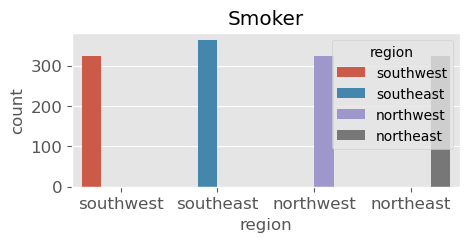

In [46]:
# Qual a relação entre fumantes e não fumantes na base de dados?
plt.figure(figsize=(5,2))
sns.countplot(x='region', hue='region', data=data_frame)
plt.title('Smoker')
plt.show()

In [47]:
data_frame["region"].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

Temos um pouco mais de southeast que das outras regiões. Vamos checar a relação entre a variável charge e as categóricas

<Axes: xlabel='smoker', ylabel='charges'>

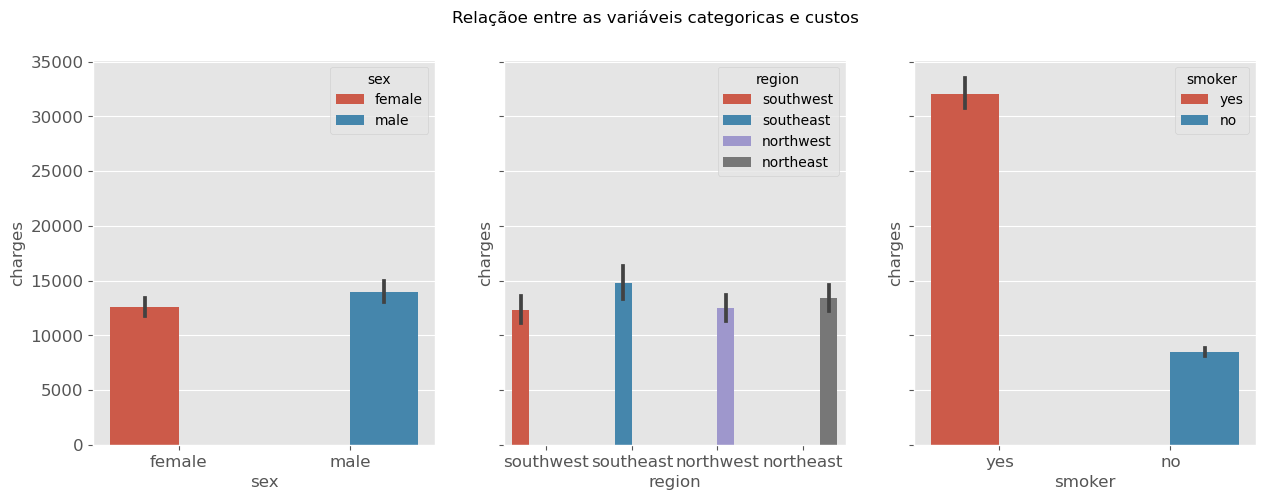

In [48]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Relaçãoe entre as variáveis categoricas e custos')
sns.barplot(x='sex', y= 'charges', hue="sex", data=data_frame, ax=axes[0])
sns.barplot(x='region', y= 'charges', hue="region", data=data_frame, ax=axes[1])
sns.barplot(x='smoker', y= 'charges', hue="smoker", data=data_frame, ax=axes[2])

<Axes: xlabel='sex', ylabel='charges'>

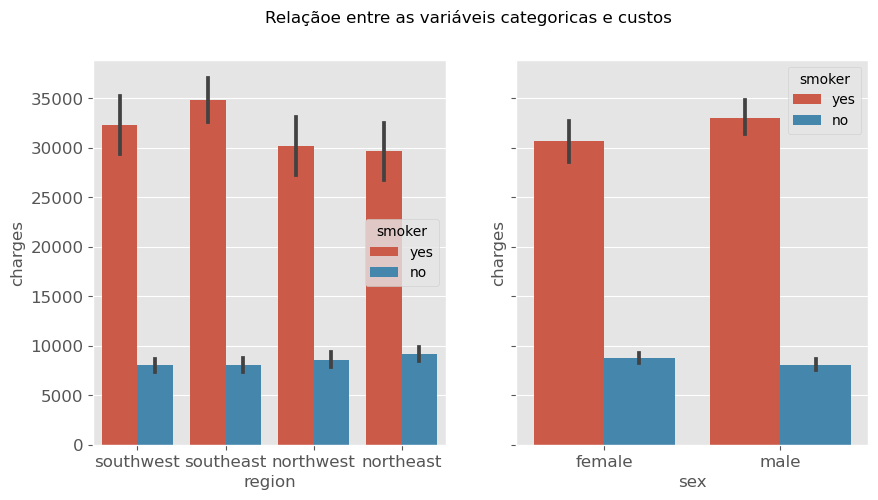

In [49]:
fig, axes = plt.subplots(1,2, figsize=(10,5), sharey=True)
fig.suptitle('Relaçãoe entre as variáveis categoricas e custos')
sns.barplot(x='region', y= 'charges', hue='smoker', data=data_frame, ax=axes[0])
sns.barplot(x='sex', y= 'charges', hue='smoker', data=data_frame, ax=axes[1])


Analisando as variáveis categórias e custo podemos perceber que as pessoas que fumam tendem a ter valores maiores de seguro saúde. Região e sexo parecem ter um valor de custo mais distribuídos

In [50]:
# Descrição dos dados numéricos
data_frame.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


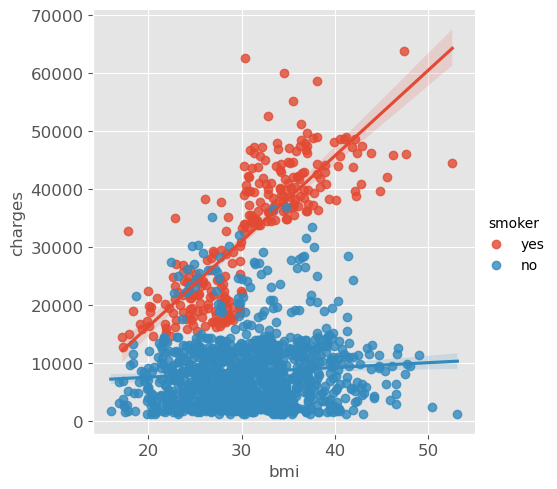

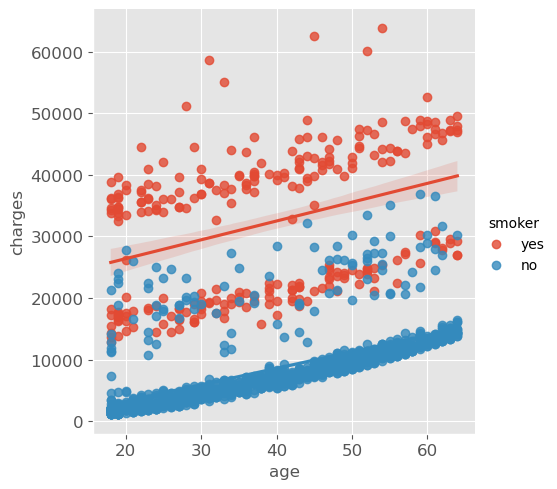

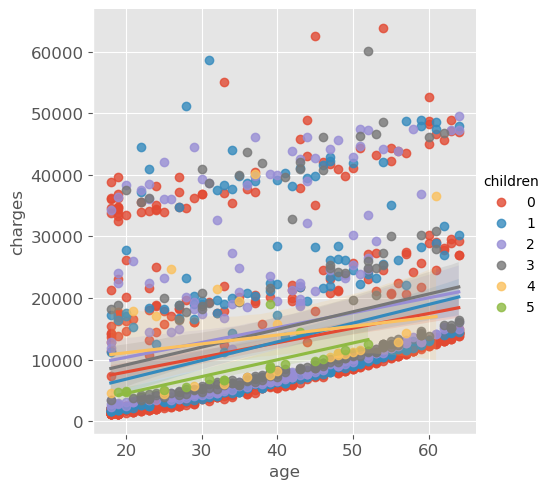

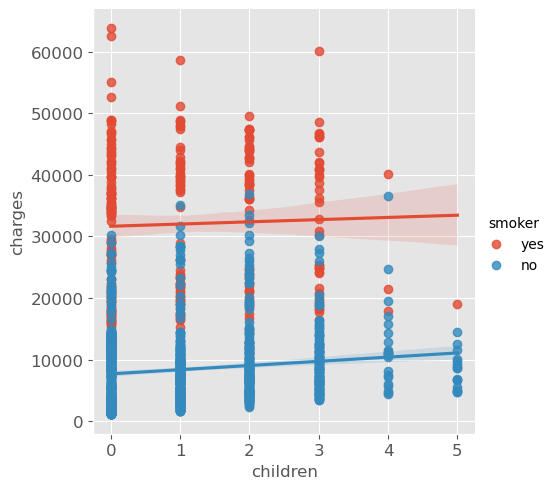

In [51]:
sns.lmplot(x='bmi', y='charges', data=data_frame, hue='smoker')
sns.lmplot(x='age', y= 'charges', data=data_frame, hue='smoker')
sns.lmplot(x='age', y= 'charges', data=data_frame, hue='children')
sns.lmplot(x='children', y= 'charges', hue='smoker', data=data_frame)

Analisando os dados numéricos podemos ver um relação entre o custo do seguro saúde com o bmi (indice de massa corporea) e se a pessoa fuma ou não. Podemos ver que Os custos são maiores entre fumantes com maior bmi. Já os não fumantes com com alto bmi tem um custo de seguro mais baixo.

Também podemos perceber que o fato da pessoa fumar também pressiona o custo com o aumento a idade

A relação entre tabagismo e a quantidade de filhos não aparenta aumentar custo, bem como o numero de filhos também não apresenta uma forte relação com o aumento de custo

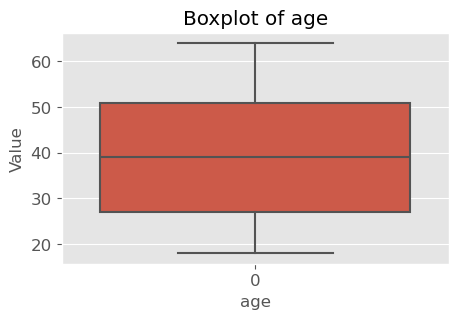

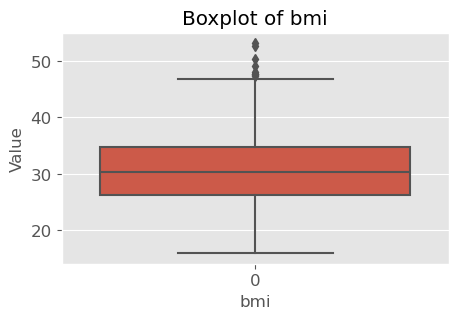

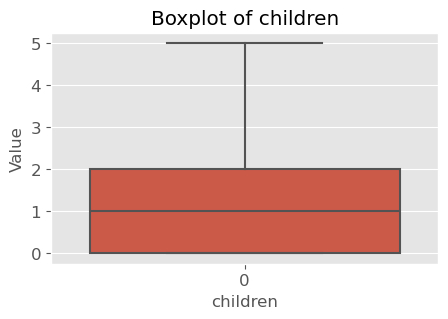

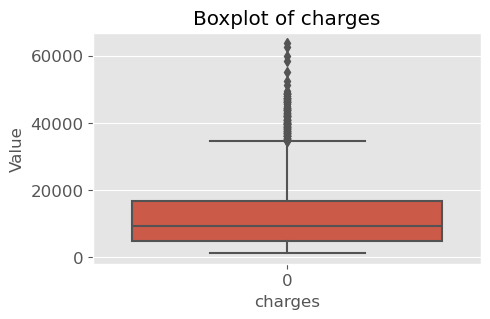

In [52]:
# Scala dos dados
for col in data_frame.select_dtypes(include=np.number).columns:
  plt.figure(figsize=(5, 3))
  sns.boxplot(data_frame[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.ylabel('Value')
  plt.show()
  print("")

In [53]:
# Vamos utilizar a tecnica de label encoder para transformar as variáveis categóricas em valores numéricos e criar um histograma com a distribuição dos dados
from sklearn.preprocessing import LabelEncoder

df_exploratorio = data_frame.copy()

label_encoder = LabelEncoder()

df_exploratorio['sex'] = label_encoder.fit_transform(df_exploratorio['sex'])
df_exploratorio['smoker'] = label_encoder.fit_transform(df_exploratorio['smoker'])
df_exploratorio['region'] = label_encoder.fit_transform(df_exploratorio['region'])

df_exploratorio.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Vamos buscar agora as correlações

In [54]:
df_exploratorio.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


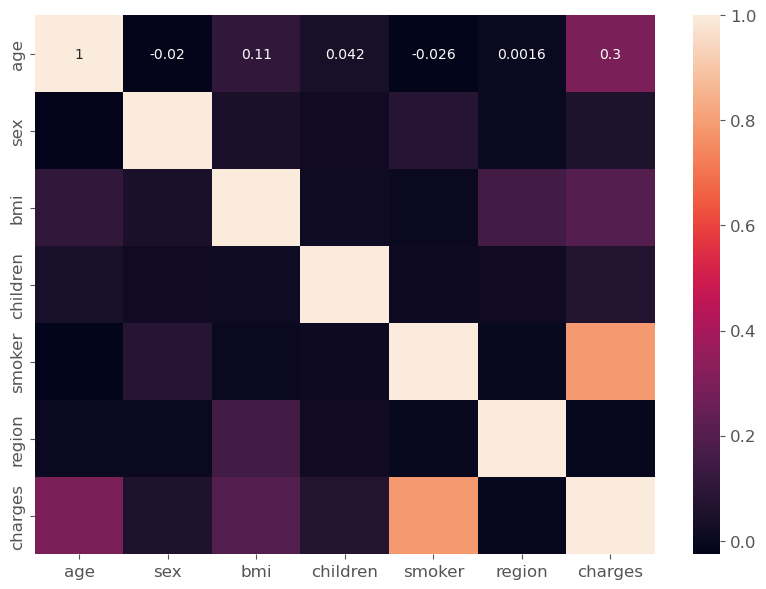

In [55]:
plt.figure(figsize=(10,7))
sns.heatmap(df_exploratorio.corr(), annot = True)
plt.show()

Quão mais claro, mais forte a relação entre uma variável com a nossa target ("charges").

Como esperado, tabagismo tem a mais forte de todas as relações seguido pela idade e o índice de massa corporal.

Nesse caso podemos dizer que region, sex e children possuem os menores níveis de relacionamento

## Preparando as variáveis para treinamento

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

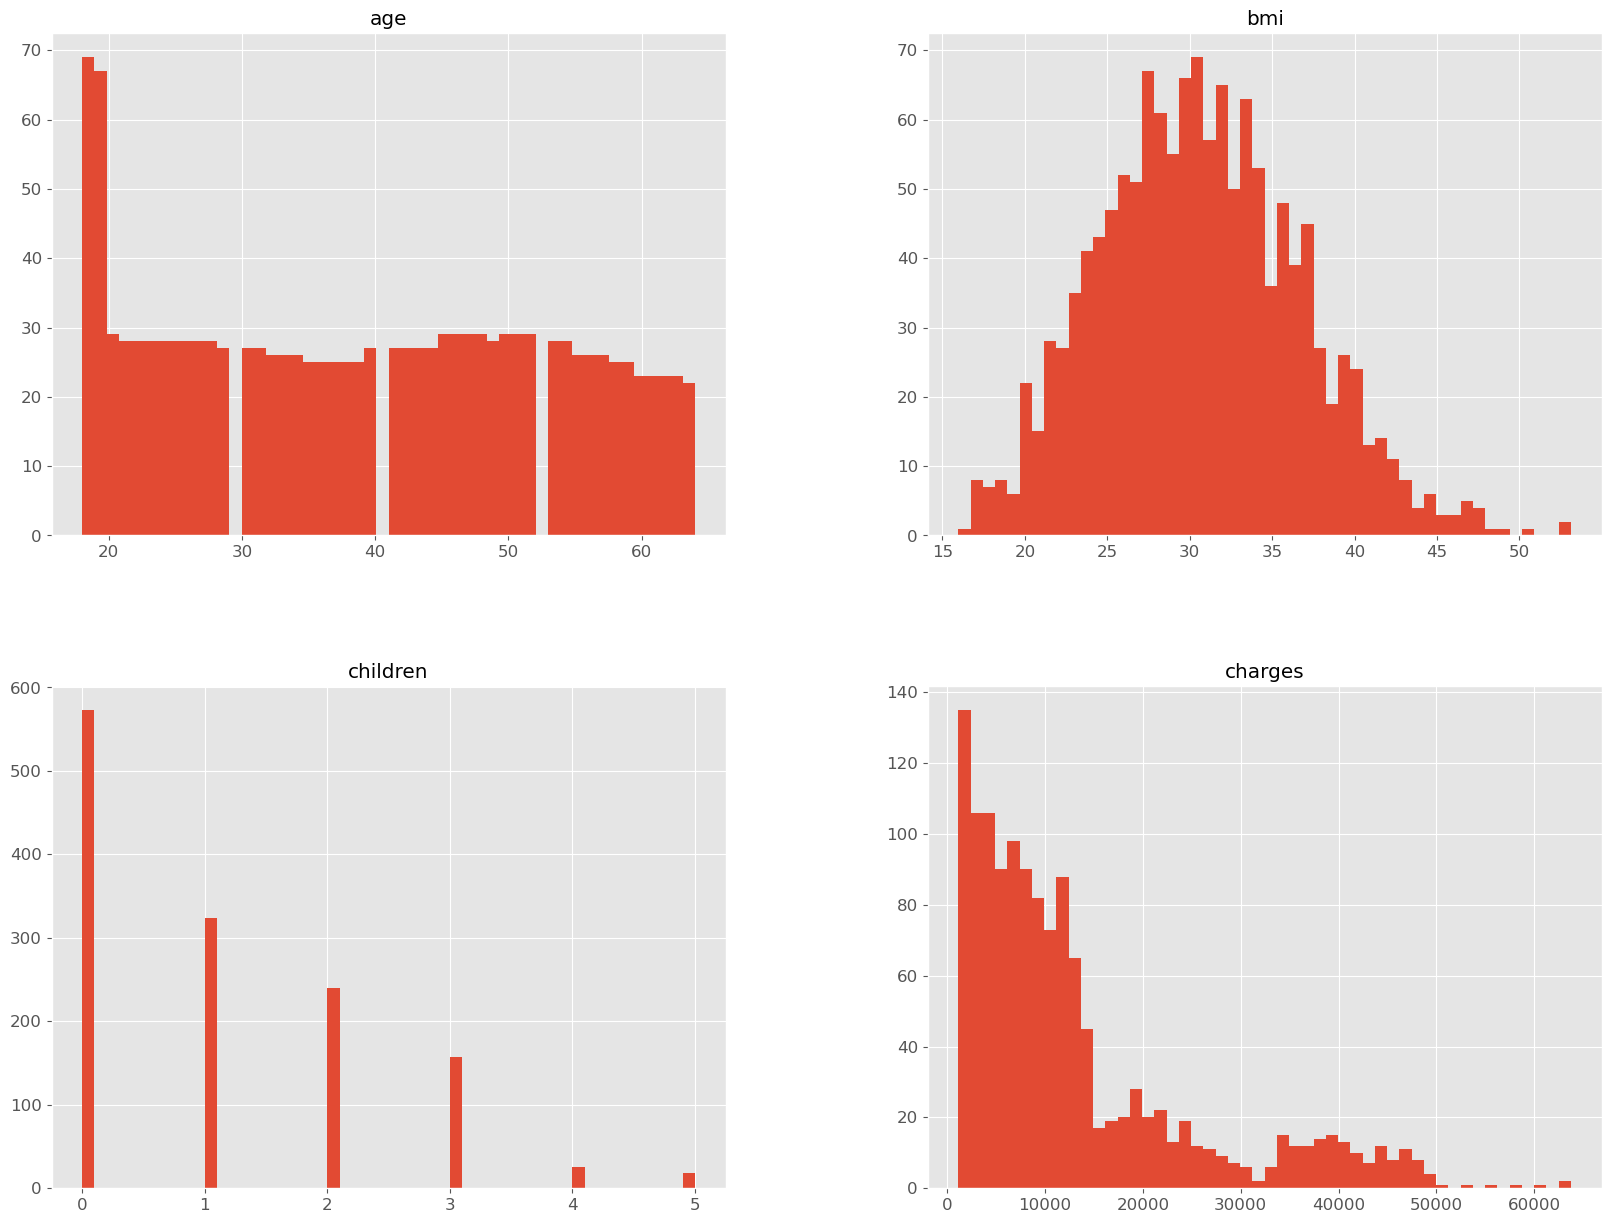

In [56]:
# criar histograma de cada atributo e plotar em uma image de 20x15
# cada histograma terá 50 bins
data_frame.hist(bins=50, figsize=(20,15))

1. A única variável que aparenta esta dispota segundo uma distribuição normal, simétrica é BMI
2. Os valores de Charges não estão distribuídos de forma simétrica
3. Idade possui possui um pico antes dos 20, mas depois disso, a distribuição de valores é relativamente homogênea, como se a pesquisa tenha focado em agrupar o mesmo numero de pessoas por idade e por
sexo



Os dados selecionado para participar do nosso lado X são smoker, bmi, age. O nosso lado Y será composto apenas da variável target.

In [57]:
data_frame['smoker'] = label_encoder.fit_transform(data_frame['smoker'])
data_frame['sex'] = label_encoder.fit_transform(data_frame['sex'])
data_frame['region'] = label_encoder.fit_transform(data_frame['region'])

In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X = data_frame.drop(['smoker'], axis=1)
y = data_frame['smoker']

# Gerando dados 
X_resampled, y_resampled = smote.fit_resample(X, y)
data_frame = X_resampled
data_frame['smoker'] = y_resampled

In [59]:
# Show smoker new value
data_frame['smoker'].value_counts()

smoker
1    1063
0    1063
Name: count, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

X = data_frame.drop('charges', axis=1)
y = data_frame['charges']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(1700, 6) (426, 6)


Função para mostrar o melhor valor de degree do PolynomialFeatures para cada modelo

In [61]:
def get_best_degree_pf(model, range, X, y):
  np.random.seed(42)

  pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('model', model)
  ])

  param_grid = {
    'poly__degree': range
  }

  grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

  x_copy = X.copy()
  y_copy = y.copy()

  grid_search.fit(x_copy, y_copy)

  best_degree = grid_search.best_params_['poly__degree']
  print(f"Best degree for {model.__class__.__name__}:", best_degree)

  best_score = -grid_search.best_score_
  print(f"Best score for {model.__class__.__name__}:", best_score)

  mse = -grid_search.cv_results_['mean_test_score']

  plt.plot(range, mse)
  plt.xlabel('Degree')
  plt.ylabel(f'Mean Squared Error {model.__class__.__name__}')
  plt.title('Mean Squared Error vs. Polynomial Degree')
  plt.show()
  print(" ")

## Treinando Modelo de Regressão Linear

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler

Best degree for LinearRegression: 3
Best score for LinearRegression: 23153702.883727595


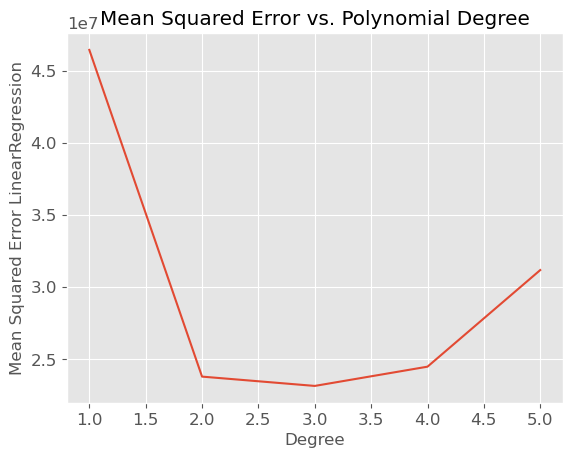

In [63]:
get_best_degree_pf(LinearRegression(), (np.arange(1, 6)), x_train, y_train)

In [64]:
poly_linear_regration = PolynomialFeatures(degree=3, include_bias=False)
x_train_linear_regration = poly_linear_regration.fit_transform(x_train.copy())
x_test_linear_regration = poly_linear_regration.fit_transform(x_test.copy())

In [65]:


from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train_linear_regration, y_train)
predictions_linear_regration = lin_reg.predict(x_test_linear_regration)

lin_mse = mean_squared_error(y_test, predictions_linear_regration)
lin_rmse = np.sqrt(lin_mse) # raiz quadrada aqui
print("Erro médio quadrático: ", lin_rmse)

r2 = r2_score(y_test, predictions_linear_regration)
print('r²',r2)


Erro médio quadrático:  4478.558101152531
r² 0.9127105992719982


## Treinando Modelo de Arvore de Decisão

Best degree for DecisionTreeRegressor: 1
Best score for DecisionTreeRegressor: 30301113.261935987


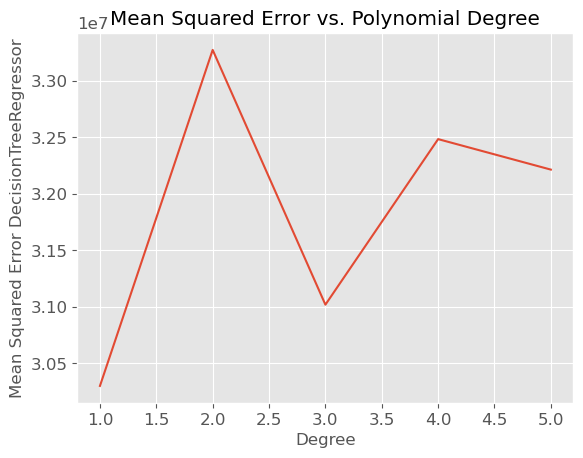

In [66]:
get_best_degree_pf(DecisionTreeRegressor(), (np.arange(1, 6)), x_train, y_train)

In [67]:
poly_decision_tree = PolynomialFeatures(degree=1, include_bias=False)
x_train_decision_tree = poly_decision_tree.fit_transform(x_train.copy())
x_test_decision_tree = poly_decision_tree.fit_transform(x_test.copy())

In [68]:
from sklearn.tree import DecisionTreeRegressor

model_dtr = DecisionTreeRegressor(max_depth=10)

model_dtr.fit(x_train_decision_tree, y_train)
predictions_decision_tree = model_dtr.predict(x_test_decision_tree)

# Avaliando
lin_mse = mean_squared_error(y_test, predictions_decision_tree)
lin_rmse = np.sqrt(lin_mse) # raiz quadrada aqui
print("Erro médio quadrático: ", lin_rmse)

r2 = r2_score(y_test, predictions_decision_tree)
print('r²',r2)

Erro médio quadrático:  5249.722597013132
r² 0.8800617253999881


## Treinando Modelo RandomForestRegressor

Best degree for RandomForestRegressor: 4
Best score for RandomForestRegressor: 18118035.977832753


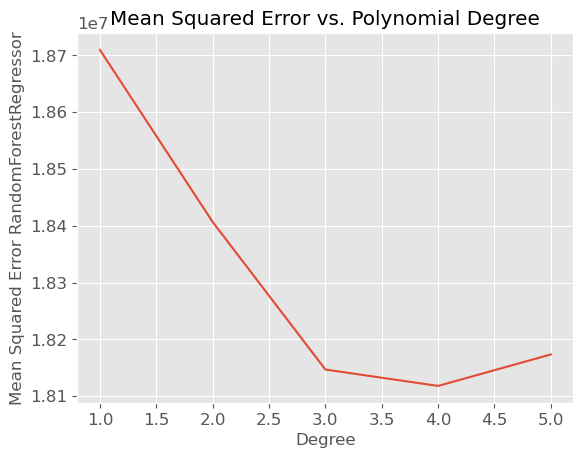

In [69]:
get_best_degree_pf(RandomForestRegressor(), (np.arange(1, 6)), x_train, y_train)

In [70]:
poly_random_forest = PolynomialFeatures(degree=4, include_bias=False)
x_train_random_forest = poly_random_forest.fit_transform(x_train.copy())
x_test_random_forest = poly_random_forest.fit_transform(x_test.copy())

In [71]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train_random_forest, y_train)

predictions = rf.predict(x_test_random_forest)

rf_mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {rf_mse:.2f}")

rf_rmse = np.sqrt(rf_mse)
print("Erro médio quadrático: ", rf_rmse)

r2 = r2_score(y_test, predictions)
print('r²',r2)

Mean Squared Error: 15822891.90
Erro médio quadrático:  3977.7998821212814
r² 0.9311393770111542


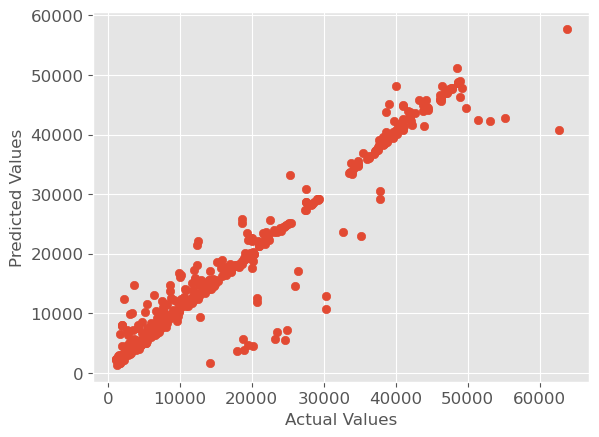

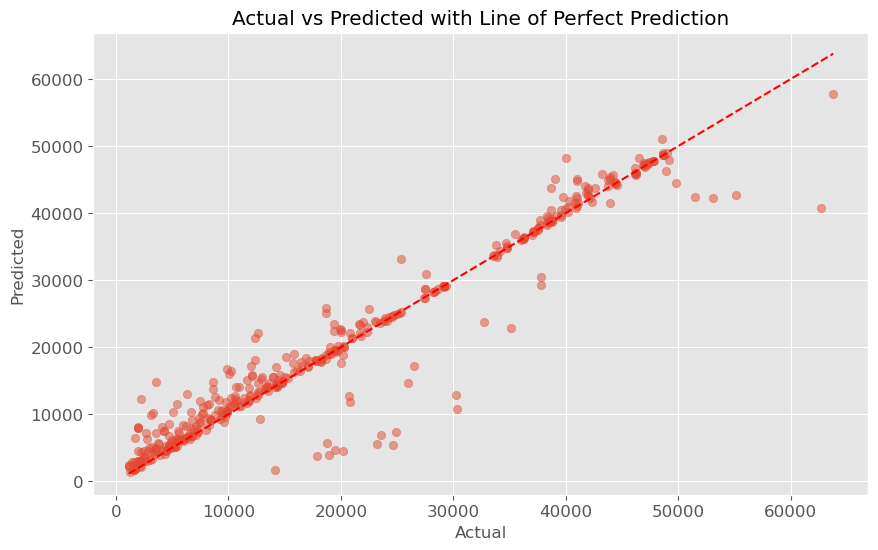

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


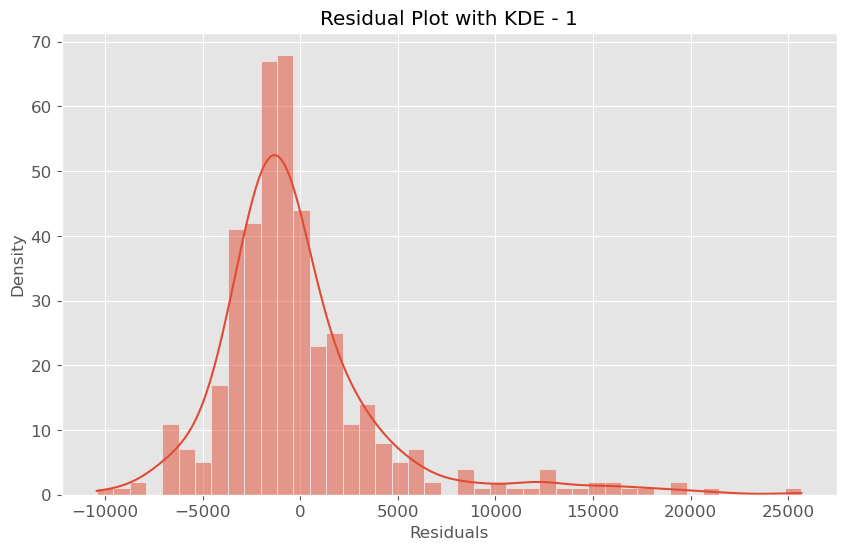

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


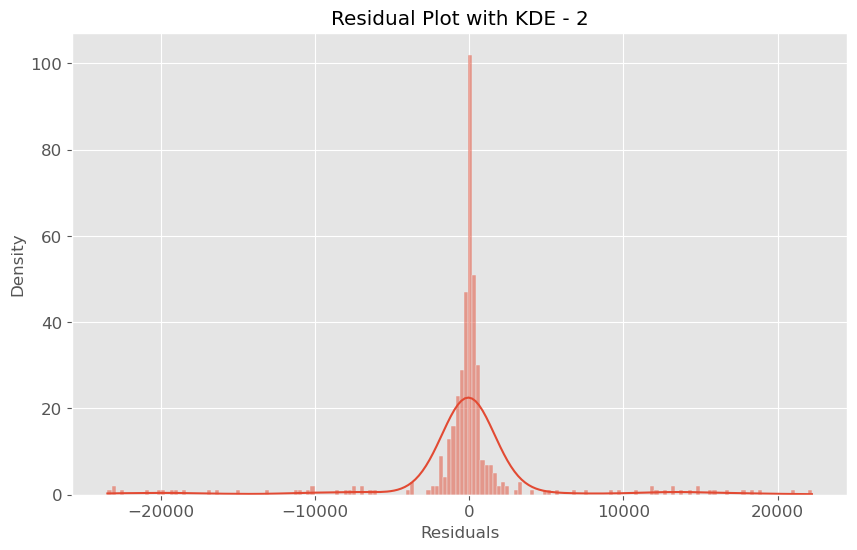

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


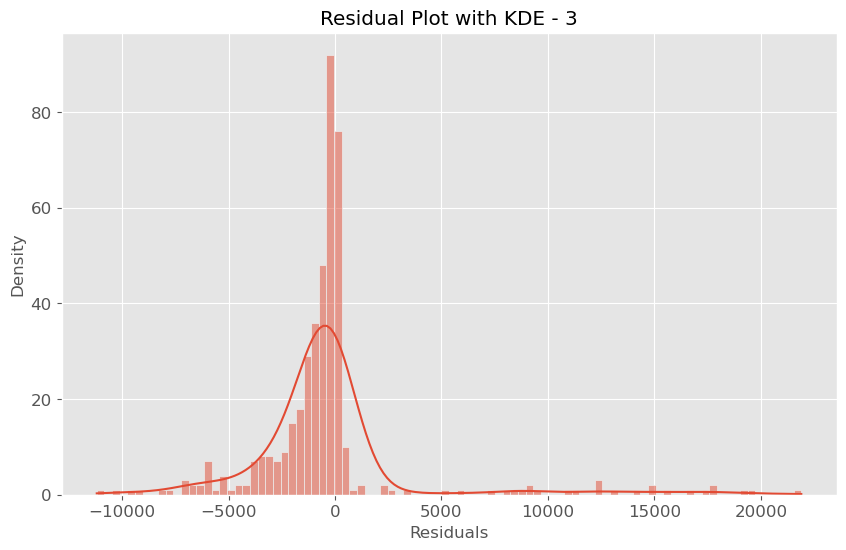

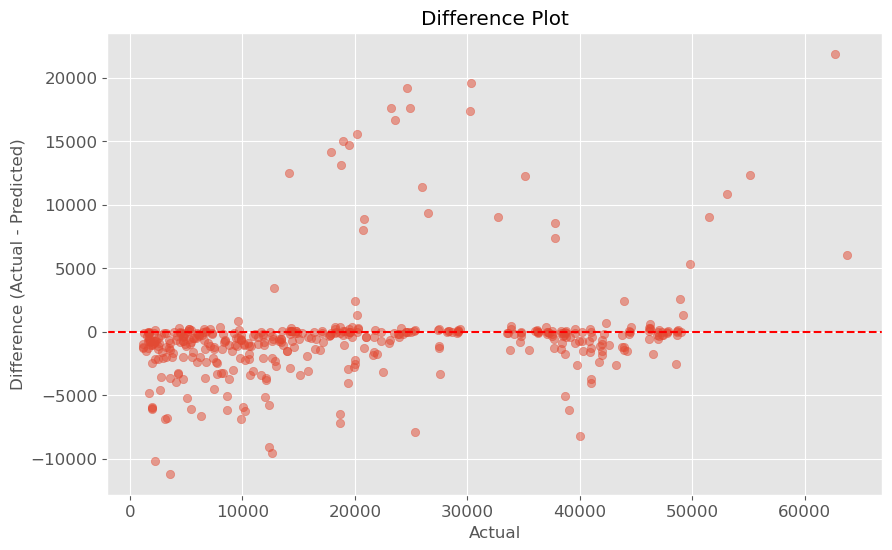

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


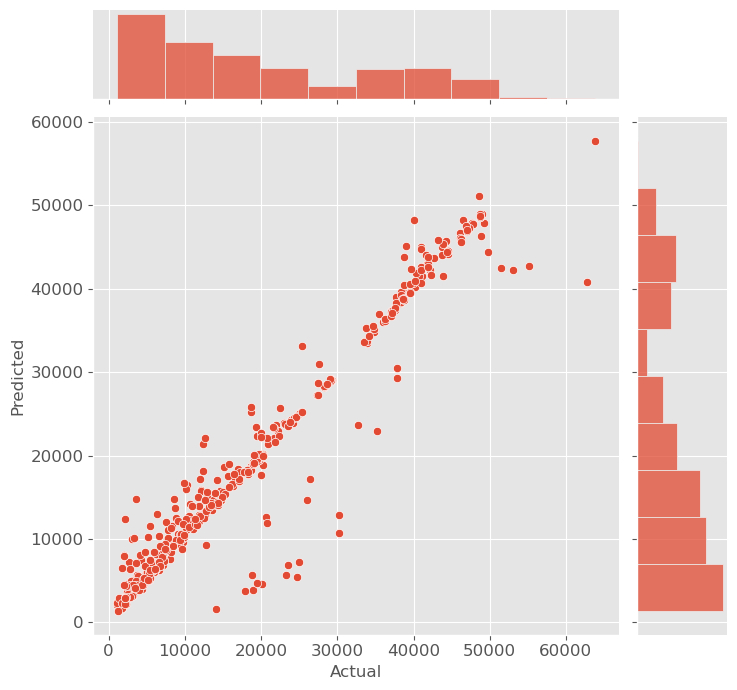

In [72]:
# Alguns gráficos interessantes para ver o resultado

# Gráfico 1
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
print(" ")

# Gráfico 2
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Line of perfect prediction
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted with Line of Perfect Prediction")
plt.show()
print(" ")


# Gráfico 3.1
residuals = y_test - predictions_linear_regration
plt.figure(figsize=(10, 10))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Residual Plot with KDE - Linear")
plt.show()
print(" ")

# Gráfico 3.2
residuals = y_test - predictions_decision_tree
plt.figure(figsize=(10, 10))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Residual Plot with KDE - Árvore de Decisão")
plt.show()
print(" ")

# Gráfico 3
residuals = y_test - predictions
plt.figure(figsize=(10, 10))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Residual Plot with KDE - RandomForest")
plt.show()
print(" ")

# Gráfico 4
difference = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, difference, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Difference (Actual - Predicted)")
plt.title("Difference Plot")
plt.show()
print(" ")

# Gráfico 5
sns.jointplot(x=y_test, y=predictions, kind='scatter', height=7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()
print(" ")